# Analisis Kanker Payudara Berdasarkan Dataset Wisconsin dengan Kategori Jinak dan Ganas

## Sumber Dataset

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

## Penjelasan Fitur dan Variabel

Dataset ini memiliki 10 fitur diagnostik, ditambah dengan satu variabel ID:

* **Sample code number**: Ini adalah nomor identifikasi unik untuk setiap sampel.
* **Clump Thickness**: Menggambarkan seberapa tebal gumpalan sel. Nilainya berkisar dari 1 hingga 10, dengan 1 menunjukkan sel-sel tersebar dan 10 menunjukkan sel-sel yang sangat berkerumun.
* **Uniformity of Cell Size**: Menilai keseragaman ukuran sel dalam sampel. Nilai 1 menunjukkan sel-sel yang seragam, sedangkan 10 menunjukkan variasi ukuran sel yang besar.
* **Uniformity of Cell Shape**: Menilai keseragaman bentuk sel dalam sampel. Mirip dengan ukuran sel, 1 menunjukkan bentuk sel yang seragam, dan 10 menunjukkan variasi bentuk sel yang signifikan.
* **Marginal Adhesion**: Mengukur kecenderungan sel untuk menempel satu sama lain pada batas gumpalan. Nilai 1 berarti sel-sel tidak banyak menempel, dan 10 berarti adhesi marginal tinggi.
* **Single Epithelial Cell Size**: Mengacu pada ukuran sel epitel tunggal. Nilai dari 1 hingga 10, di mana 1 adalah sel kecil dan 10 adalah sel besar.
* **Bare Nuclei**: Menunjukkan jumlah inti sel yang tidak tertutup oleh sitoplasma (inti telanjang). Nilai 1 hingga 10, di mana 1 menunjukkan tidak ada inti telanjang dan 10 menunjukkan banyak.
* **Bland Chromatin**: Mengukur tekstur kromatin (materi genetik dalam nukleus). Nilai 1 adalah kromatin halus, sedangkan 10 adalah kromatin kasar yang tidak teratur.
* **Normal Nucleoli**: Menilai jumlah nukleoli yang menonjol (struktur di dalam inti sel). Nilai 1 adalah nukleoli tidak terlihat atau normal, dan 10 menunjukkan nukleoli yang besar dan banyak.
* **Mitoses**: Mengukur jumlah pembelahan sel (mitosis) yang terlihat. Nilai 1 menunjukkan sedikit atau tidak ada mitosis, dan 10 menunjukkan tingkat pembelahan sel yang tinggi.


In [1]:
%pip install ucimlrepo


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Kualitas Data dan Visualisasi:

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [3]:
import pandas as pd

# Gabungkan fitur dan target
df_breastcancer = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_breastcancer))
print("Visualisasi dataset breastcancer")
print(df_breastcancer.to_string(index=False))


Total baris dataset ini adalah = 699
Visualisasi dataset breastcancer
 Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses  Class
               5                        1                         1                  1                            2          1.0                3                1        1      2
               5                        4                         4                  5                            7         10.0                3                2        1      2
               3                        1                         1                  1                            2          2.0                3                1        1      2
               6                        8                         8                  1                            3          4.0                3                7        1      2
               4                   

In [4]:
# Simpan ke file CSV
df_breastcancer.to_csv('datasetbreastcancer.csv', index=False)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dan beri nama kolom (kalau belum)
data = pd.read_csv("datasetbreastcancer.csv", header=None)
data.columns = [
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]

# Konversi kolom 'Bare Nuclei' ke numerik (ada nilai '?')
data["Bare Nuclei"] = pd.to_numeric(data["Bare Nuclei"], errors='coerce')

# Buang baris yang ada NaN (karena nilai '?')
data = data.dropna()

# Visualisasi distribusi fitur-fitur
plt.figure(figsize=(15, 10))
plt.suptitle('Distribusi Fitur', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<Figure size 1500x1000 with 0 Axes>

## Struktur Dataset

In [29]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

(683, 10)

In [30]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [31]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom

,0
Clump Thickness,object
Uniformity of Cell Size,object
Uniformity of Cell Shape,object
Marginal Adhesion,object
Single Epithelial Cell Size,object
Bare Nuclei,float64
Bland Chromatin,object
Normal Nucleoli,object
Mitoses,object
Class,object


In [32]:
import pandas as pd

# Buat label diagnosis dalam bentuk teks agar mudah dibaca
data['Diagnosis'] = data['Class'].map({2: 'Benign', 4: 'Malignant'})

# Hitung jumlah sampel per kelas diagnosis
print(data.groupby('Diagnosis').size())


Series([], dtype: int64)


## Preprocessing data

### Normalisasi data

Pada data ini, dilakukan normalisasi atau standarisasi menggunakan StandardScaler dari library sklearn

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
data = pd.read_csv("datasetbreastcancer.csv", header=None)
data.columns = [
    "Clump Thickness", "Uniformity of Cell Size",
    "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
    "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"
]

# 2. Preprocessing
data["Bare Nuclei"] = pd.to_numeric(data["Bare Nuclei"], errors='coerce')
data = data.dropna()
X = data.drop(columns=["Class"])
y = data["Class"]

# 3. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Modelling

### Modelling klasifikasi data kanker payudara dengan SVM (Support Vector Machine)

Akurasi: 0.9708029197080292

Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.99      0.97        79
           4       0.98      0.95      0.96        58

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



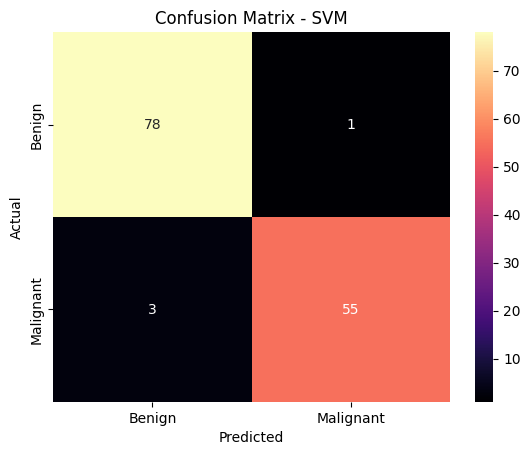

In [34]:

# 5. SVM Model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# 6. Prediksi dan Evaluasi
y_pred = svm_model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


### Modelling klasifikasi data kanker payudara dengan Decision Tree

Akurasi: 0.9197080291970803

Classification Report:
               precision    recall  f1-score   support

           2       0.90      0.97      0.93        79
           4       0.96      0.84      0.90        58

    accuracy                           0.92       137
   macro avg       0.93      0.91      0.92       137
weighted avg       0.92      0.92      0.92       137



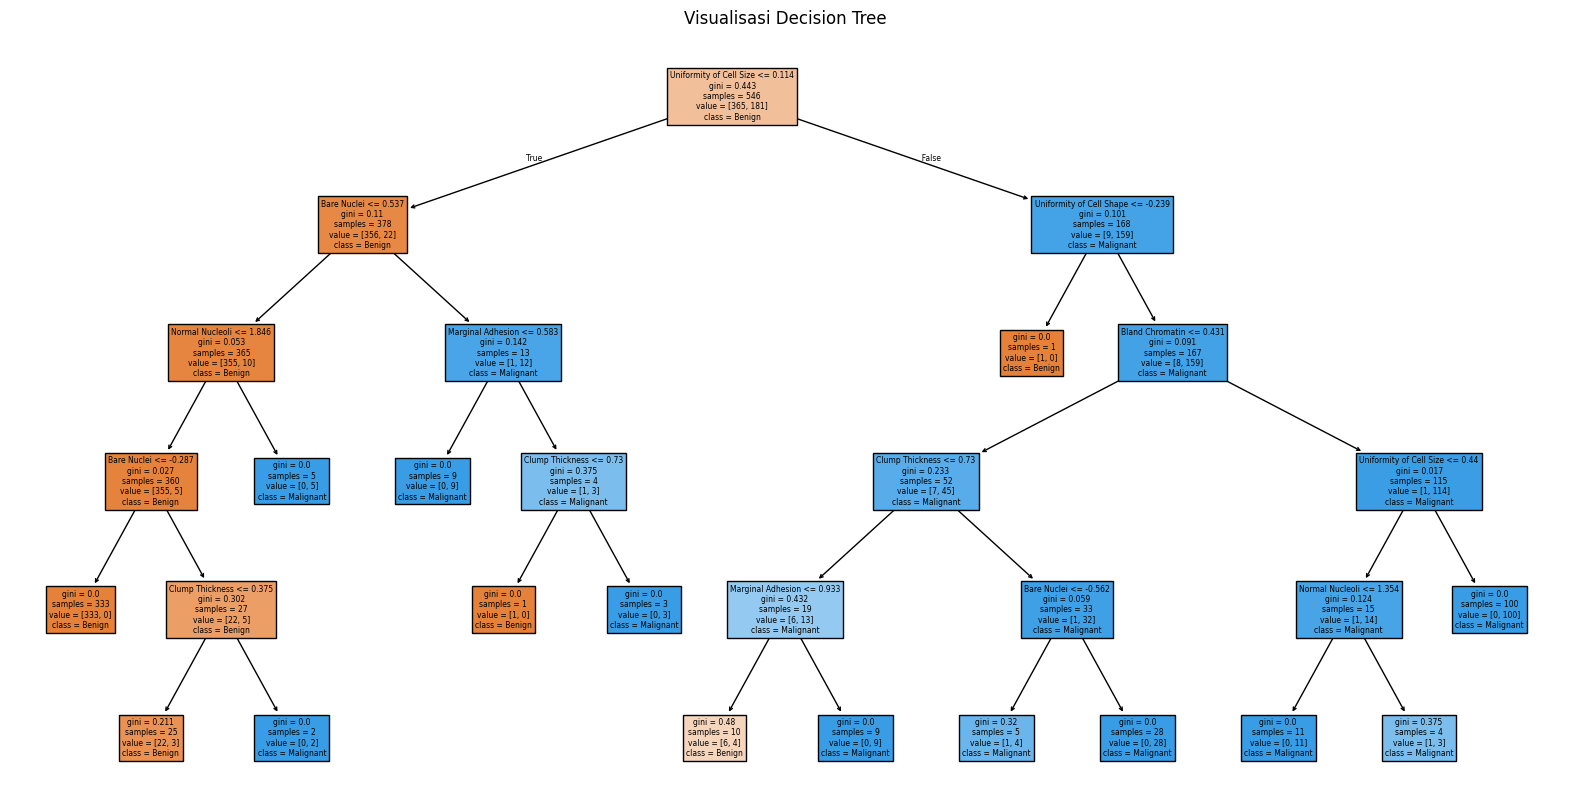

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Latih model Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# 5. Evaluasi model
y_pred = dt_model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Visualisasi pohon keputusan (opsional)
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["Benign", "Malignant"], filled=True)
plt.title("Visualisasi Decision Tree")
plt.show()


### Modelling klasifikasi data kanker payudara dengan Gaussian Naive Bayes

Akurasi: 0.9562043795620438

Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.96      0.96        79
           4       0.95      0.95      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



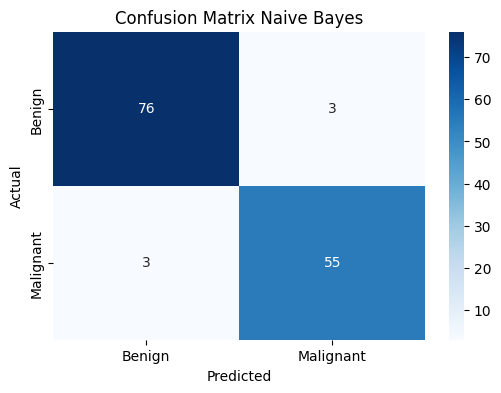

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 4. Latih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 5. Evaluasi model
y_pred = nb_model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 6. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Naive Bayes")
plt.show()


## Evaluasi

Akurasi ketiga model

* SVM = 97,08%
* Decision Tree = 91,97%
* Gaussian Naive Bayes = 95,62%

Dari ketiga model diatas, akurasi tertinggi dimiliki oleh SVM